Example 1
=========

Central limit theorem
---------------------

The Central Limit Theorem (CLT) tells us about the limiting distribution
of the sample mean for distribution for an independent and identically
distributed (IID) sample with a finite variance. It underpins many
results in statistics and is important for reasoning about stochastic
processes.

### Question

Explain in simple terms what is the Central Limit Theorem?

In [ ]:
Regardless of the distribution of the population, repeated random sampling will always result in a distribution close to normal. (converges towards the mean of the population)

Example: CLT
------------

To see that the distribution of the sample mean converges to a normal
distribution we will do a simulation study.

### Question

Write down the distribution of the sample mean given an IID sample of
exponential random variables with rate $1/5$.

### Question

1.  Generate 500 sample means each based on a sample of 100 exponential
    random variables
2.  Make a visualisation of the distribution of the data (e.g., a KDE or
    histogram) and overlay the CLT approximation.

In [15]:
import numpy as np
import random
samples_means = [np.random.exponential(5, 100).mean() for i in range(500)]# rate is 0.5, scale is inverse of rate

<AxesSubplot:ylabel='Density'>

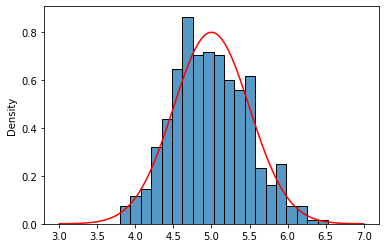

In [49]:
import seaborn as sns

sns.histplot(samples_mean, bins = 20, stat = "density")

est_range = np.linspace(3, 7, 100)
est_scale = 5 / np.sqrt(100)
est_dist = stats.norm.pdf(est_range, loc = 5, scale = est_scale)
sns.lineplot(x = est_range, y = est_dist, color = "red")

Estimating the mean of a small sample
-------------------------------------

If we have a sample from a normal distribution with sample mean $\bar{x}$ and known the standard deviation, $\sigma$, the $(1-\alpha)100\%$ CI for the estimate of the mean is

$$
\bar{x} \pm z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}
$$

### Question

Simulate a set of 5 draws from a $N(1,1)$ distribution and, assuming the standard deviation is known, check if the $95\%$ CI contains the true mean.

### Question

Now repeat this process 1000 times and check how many times it contains the true mean. Do you think the coverage of the CI will be correct?

### Question

Now repeat this 1000-fold repetition using the sample standard deviation instead of the true standard deviation but treat it as though it is known, ie continue with $z_{\alpha / 2}$. Do you think the coverage of the CI will be correct?

### Question

Now repeat this process while accounting for the uncertainty in the standard deviation, ie use the $t_{\alpha / 2}$. How many degrees of freedom are there in the _t_-distribution? Do you think the coverage of the CI will be correct?

Testing the hypothesis that a coin is fair
------------------------------------------

There is an election to choose between candidate _A_ and candidate _B_. To win the election a candidate needs to get the majority of the votes. Candidate _B_ declared victory but there is suspicion that they cheated. A random sample of $n$ ballots had $m$ votes for _A_. We want to know if we can reject the null hypothesis that _B_ did in fact win.

### Question

Would we reject the null if $n=100$ and $m=70$? 

### Question

If $n=100$, how small would $m$ need to be for us to not be able to reject the null using this test?

Parameter estimation of the binomial distribution
-------------------------------------------------

We want to make an *estimate* the probability that a coin comes up
heads. We also want to understand the level of confidence we have in
this estimate; we use a *confidence interval* (CI) to describe the range
of values we are confident the \"true\" probability of heads lies
within.

Binomial random variables can be used to model the number of times a
coin comes up heads when flipped $n$ times. Let $X$ be a binomial random
variable (RV) representing the number of heads that are observed when a
coin is flipped $n$ times and the probability of coming up heads is $p$.
We assume that $n$ is known but $p$ is unknown.

The expected value of $X$, ie the average number of times that the coin
comes up heads, is $np$. So a simple way to estimate $p$ is to divide
the number of heads, $X$, by the number of flips, $n$. This gives the
estimate

$$
\hat{p} = X / n.
$$

This estimator is called the [the method of
moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)). This is
also an example of a maximum likelihood estimate (MLE).

Given an estimator, such as $\hat{p}$, we usually want to quantify the
uncertainty. One way to construct a CI is to approximate the sampling
distribution by a normal distribution. It is a bit crude, but it is acceptable
when we have lots of data. The estimated standard error of $\hat{p}$ is
$\sqrt{\hat{p}(1-\hat{p})/n}$, so the CI is given by

$$
\hat{p} \pm z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

where $z$ is the appropriate quantile of the standard normal distribution. In
the case of a $95\%$ distribution this value is $1.96$.

### Question

State the limitations on the estimator we are using for the CI.

### Question

Implement a function called `estimate_and_ci` which takes two
arguments: `num_trials` which is $n$ in the description above, and
`num_success` which is $X$ above. The function should return
`(p_hat,(ci_lower,ci_upper))` where `p_hat` is $\hat{p}$ and
`ci_x` are the limits of the $95\%$ CI.

### Question

Simulate a binomial random variable with $n=100$ and $p=0.6$. Then use
the value and the `estimate_and_ci` function to see how well you
can estimate $p$. Write a couple of sentences to explain this.

Recall that in a previous example we have looked at how to simulate
random variables using `scipy.stats`.

### Question

Repeat the process from the previous question 100000 times and see what
proportion of the CIs capture the true value of $p$. Is it what you
expect? Write a couple of sentences to explain what you found.